Data Exploration & Visualizations

In [ ]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to apear inside the notebook
%matplotlib inline 

In [37]:
df = pd.read_csv("heart_cleveland_upload.csv")

#df.shape -> shows (rows, columns) of the dataset
print(f"Heart Disease Data : {df.shape[0]} Number of Rows & {df.shape[1]} Number of Columns")

Heart Disease Data : 297 Number of Rows & 14 Number of Columns


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

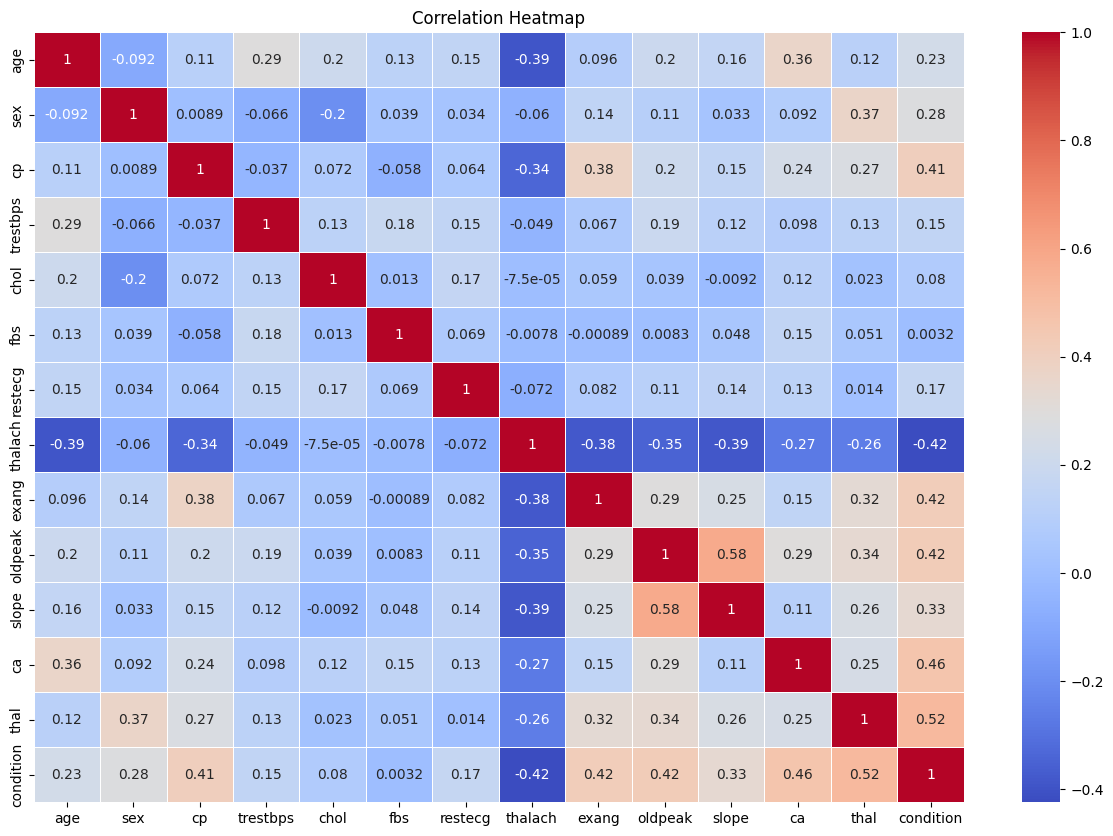

In [48]:
# Correlation Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

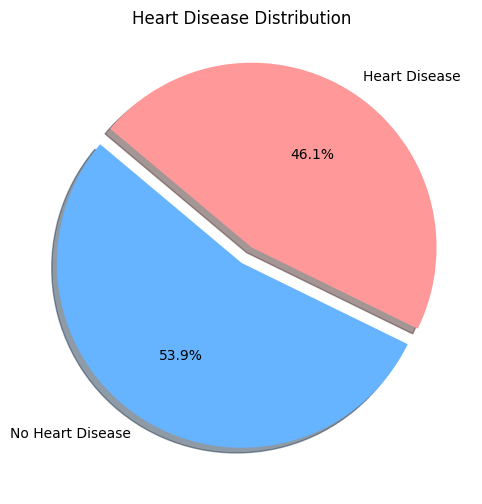

In [47]:
# Condition variable (0 = No Disease, 1 = Disease)
target_counts = df['condition'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0,0.1], startangle=140, shadow=True)
plt.title('Heart Disease Distribution')
plt.show()

Modeling

In [54]:
# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Split data into X and y
X = df.drop("condition",axis=1)

y = df["condition"]

In [51]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Logistic Regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction_lr = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, prediction_lr)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, prediction_lr))

Logistic Regression Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [105]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, prediction_knn)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, prediction_knn))

KNN Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [106]:
knn_xtrain_prediction = knn.predict(X_train)
knn_trained_accuracy = accuracy_score(y_train, knn_xtrain_prediction)
print("KNN trained data Accuracy:", knn_trained_accuracy)

lr_xtrain_prediction = logreg.predict(X_train)
lr_trained_accuracy = accuracy_score(y_train, lr_xtrain_prediction)
print("Logistic Regression trained data Accuracy:", lr_trained_accuracy)

KNN trained data Accuracy: 0.8565400843881856
Logistic Regression trained data Accuracy: 0.869198312236287


In [109]:
# Finding best k-value for knn to solve overfitting
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best k: {'n_neighbors': 3}
Best CV score: 0.8771739130434781


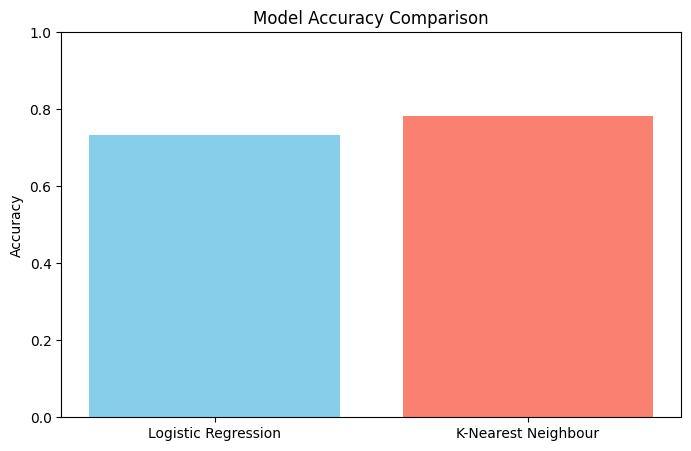

In [81]:
# Model Comparison Visualization

models = ["Logistic Regression", "K-Nearest Neighbour"]
accuracies = [logreg_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Saving the models

In [84]:
import pickle

pickle.dump(logreg, open('logistic_model.pkl', 'wb'))
pickle.dump(knn, open('knn_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Models and scaler saved successfully.")

Models and scaler saved successfully.


In [85]:
pickle.dump(logreg, knn, open('heart_model.pkl', 'wb

print("Successfully saved model and scaler")

TypeError: '_io.BufferedWriter' object cannot be interpreted as an integer